In [2]:
from keras.models import Sequential
from keras.layers.core import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#### 1-1

In [5]:
a = np.arange(0, 5, 0.5)
a

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

#### 1-2

In [8]:
b = np.arange(1,11,1).reshape(2,5)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

#### 1-3

In [10]:
c = np.identity(n=3, dtype=np.int8)
c

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]], dtype=int8)

#### 1-4

In [15]:
d = np.ones((4, 4), dtype="i8")
d

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=int64)

#### 1-5

In [18]:
e = np.arange(1,25,2).reshape(3,4)
e

array([[ 1,  3,  5,  7],
       [ 9, 11, 13, 15],
       [17, 19, 21, 23]])

### 2

In [65]:
data2 = pd.read_csv("dataf2.csv", encoding="euc-kr",
                    names=['지역', '2015', '2010', '2005','2000','2010-2015','증가율']
                   )
data2

,지역,2015,2010,2005,2000,2010-2015,증가율
0,수도권,9904312,9631482,9762546,9853972,NaN,0.0283
1,경상권,3448737,3393191,3512547,3655437,NaN,0.0163
2,수도권,2890451,2632035,2517680,2466338,NaN,0.0982
3,경상권,2466052,2431774,2456016,2473990,NaN,0.0141


In [66]:
data2.index = ['서울','부산','인천','대구']

In [67]:
data2['2015']

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 2015, dtype: int64

In [68]:
data2['2010-2015'] = ((data2['2015'] / data2['2010'])**(1/2)-1)

In [69]:
data2

,지역,2015,2010,2005,2000,2010-2015,증가율
서울,수도권,9904312,9631482,9762546,9853972,0.014065,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.008152,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.047941,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.007023,0.0141


### 3

In [70]:
import seaborn as sns
tita = sns.load_dataset("titanic")

In [72]:
tita.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [100]:
pd.value_counts(tita['sex'])

male      577
female    314
Name: sex, dtype: int64

In [102]:
pd.value_counts(tita['class'])

Third     491
First     216
Second    184
Name: class, dtype: int64

In [103]:
pd.value_counts(tita['alive'])

no     549
yes    342
Name: alive, dtype: int64

In [92]:
bins = [1, 15, 30, 45, 60, 99]
labels = ["미성년자", "청년", "중년", "장년", "노년"]

In [93]:
tita["age_cut"] = pd.cut(tita.age, bins, labels = labels)
tita.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cut
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,청년
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,중년
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,청년
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,중년
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,중년


In [114]:
pd.value_counts(tita['age_cut'])

청년      326
중년      202
장년       81
미성년자     69
노년       22
Name: age_cut, dtype: int64

### 4

In [115]:
tips = sns.load_dataset("tips")

In [116]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [123]:
tips['tip_per'] = ((tips['tip'] / tips['total_bill'])*100).round(2)

In [124]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_per
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [128]:
tips.pivot_table("tip_per", "day")   # 금요일

,tip_per
day,
Thur,16.126452
Fri,16.991579
Sat,15.314598
Sun,16.689605


### 5

In [129]:
import sqlite3
conn = sqlite3.connect('test.db')

In [130]:
cur = conn.cursor()
cur.execute('CREATE TABLE Eagles \
              (back_no INT NOT NULL, \
              Name TEXT, \
              Position INT, \
              PRIMARY KEY(back_no));')

In [131]:
player = pd.DataFrame({
    '백넘버': ['8','52','32','11','5'],
    '이름': ['정근우','김태균','송광민','이성열','정은원'],
    '포지션': ['내야수','내야수','내야수','외야수','내야수']
})
player

,백넘버,이름,포지션
0,8,정근우,내야수
1,52,김태균,내야수
2,32,송광민,내야수
3,11,이성열,외야수
4,5,정은원,내야수


In [132]:
cur = conn.cursor()
sql = 'INSERT INTO Eagles VALUES (?, ?, ?);'
for i in range(5):
    cur.execute(sql, (player.iloc[i,0],
                      player.iloc[i,1],
                      player.iloc[i,2]))
conn.commit()

In [133]:
cur = conn.cursor()
cur.execute("SELECT * FROM Eagles;")
rows = cur.fetchall()
for row in rows:
    print(row)

(8, '정근우', '내야수')
(52, '김태균', '내야수')
(32, '송광민', '내야수')
(11, '이성열', '외야수')
(5, '정은원', '내야수')


In [152]:
query = "UPDATE Eagles SET Position = '외야수' WHERE Name = '정근우';"
cur.execute(query)
conn.commit()

In [153]:
cur = conn.cursor()
cur.execute("SELECT * FROM Eagles;")
rows = cur.fetchall()
for row in rows:
    print(row)

(8, '정근우', '외야수')
(52, '김태균', '내야수')
(32, '송광민', '내야수')
(11, '이성열', '외야수')
(5, '정은원', '내야수')


In [158]:
query = "DELETE from Eagles WHERE back_no = 52;"
cur.execute(query)
conn.commit()

In [159]:
cur = conn.cursor()
cur.execute("SELECT * FROM Eagles;")
rows = cur.fetchall()
for row in rows:
    print(row)

(8, '정근우', '외야수')
(11, '이성열', '외야수')
(5, '정은원', '내야수')


### 6

In [160]:
def sigmoid(x):
    return 1/ (1 + np.exp(-x))

def desigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [163]:
x = np.arange(-3,4)
x

array([-3, -2, -1,  0,  1,  2,  3])

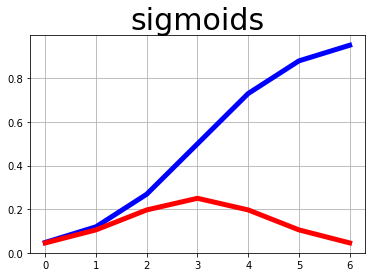

In [169]:
plt.title("sigmoids", size=30)
plt.grid()
plt.plot(sigmoid(x), c="b", lw=5)
plt.plot(desigmoid(x), c="r", lw=5)

### 7

- 1) gradient descent
- 2) learning rate
- 3) perceptron
- 4) relu
- 5) 은닉층

### 8

In [170]:
iris = sns.load_dataset("iris")

In [171]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [174]:
dataset = iris.values
X = dataset[:,0:4]
Y_obj = dataset[:,4]

In [175]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [176]:
n_fold = 10
skf = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=seed)

accuracy = []

In [180]:
for train, test in skf.split(X, Y):
    model = Sequential()
    model.add(Dense(24, input_dim=4, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss="mean_squared_error",
                 optimizer='adam',
                 metrics=['accuracy'])
    model.fit(X[train], Y[train], epochs=100, batch_size=5)
    k_accuracy = "%.4f" % (model.evaluate(X[test], Y[test])[1])
    accuracy.append(k_accuracy)

Epoch 1/100
135/135 [==============================] - 0s 3ms/step - loss: 2.4958 - acc: 0.0815 
Epoch 2/100
135/135 [==============================] - 0s 156us/step - loss: 0.6111 - acc: 0.3778
Epoch 3/100
135/135 [==============================] - 0s 178us/step - loss: 0.3692 - acc: 0.5407
Epoch 4/100
135/135 [==============================] - 0s 163us/step - loss: 0.2902 - acc: 0.5481
Epoch 5/100
135/135 [==============================] - 0s 170us/step - loss: 0.2353 - acc: 0.5556
Epoch 6/100
135/135 [==============================] - 0s 148us/step - loss: 0.1910 - acc: 0.6370
Epoch 7/100
135/135 [==============================] - 0s 156us/step - loss: 0.1527 - acc: 0.8074
Epoch 8/100
135/135 [==============================] - 0s 163us/step - loss: 0.1134 - acc: 0.9407
Epoch 9/100
135/135 [==============================] - 0s 141us/step - loss: 0.0793 - acc: 0.9556
Epoch 10/100
135/135 [==============================] - 0s 148us/step - loss: 0.0580 - acc: 0.9704
Epoch 11/100
135/135

135/135 [==============================] - 0s 141us/step - loss: 0.0385 - acc: 0.9852
Epoch 84/100
135/135 [==============================] - 0s 156us/step - loss: 0.0382 - acc: 0.9704
Epoch 85/100
135/135 [==============================] - 0s 170us/step - loss: 0.0367 - acc: 0.9852
Epoch 86/100
135/135 [==============================] - 0s 148us/step - loss: 0.0382 - acc: 0.9481
Epoch 87/100
135/135 [==============================] - 0s 141us/step - loss: 0.0364 - acc: 0.9778
Epoch 88/100
135/135 [==============================] - 0s 141us/step - loss: 0.0362 - acc: 0.9852
Epoch 89/100
135/135 [==============================] - 0s 148us/step - loss: 0.0361 - acc: 0.9778
Epoch 90/100
135/135 [==============================] - 0s 148us/step - loss: 0.0359 - acc: 0.9630
Epoch 91/100
135/135 [==============================] - 0s 141us/step - loss: 0.0354 - acc: 0.9778
Epoch 92/100
135/135 [==============================] - 0s 141us/step - loss: 0.0350 - acc: 0.9852
Epoch 93/100
135/135 [=

135/135 [==============================] - 0s 156us/step - loss: 0.0358 - acc: 0.9926
Epoch 66/100
135/135 [==============================] - 0s 141us/step - loss: 0.0385 - acc: 0.9852
Epoch 67/100
135/135 [==============================] - 0s 178us/step - loss: 0.0393 - acc: 0.9852
Epoch 68/100
135/135 [==============================] - 0s 163us/step - loss: 0.0366 - acc: 0.9852
Epoch 69/100
135/135 [==============================] - 0s 170us/step - loss: 0.0362 - acc: 0.9704
Epoch 70/100
135/135 [==============================] - 0s 148us/step - loss: 0.0355 - acc: 0.9852
Epoch 71/100
135/135 [==============================] - 0s 141us/step - loss: 0.0355 - acc: 0.9926
Epoch 72/100
135/135 [==============================] - 0s 163us/step - loss: 0.0347 - acc: 0.9926
Epoch 73/100
135/135 [==============================] - 0s 133us/step - loss: 0.0379 - acc: 0.9778
Epoch 74/100
135/135 [==============================] - 0s 156us/step - loss: 0.0403 - acc: 0.9778
Epoch 75/100
135/135 [=

135/135 [==============================] - 0s 148us/step - loss: 0.0473 - acc: 0.9704
Epoch 48/100
135/135 [==============================] - 0s 156us/step - loss: 0.0507 - acc: 0.9556
Epoch 49/100
135/135 [==============================] - 0s 163us/step - loss: 0.0443 - acc: 0.9556
Epoch 50/100
135/135 [==============================] - 0s 170us/step - loss: 0.0366 - acc: 0.9704
Epoch 51/100
135/135 [==============================] - 0s 156us/step - loss: 0.0390 - acc: 0.9926
Epoch 52/100
135/135 [==============================] - 0s 163us/step - loss: 0.0397 - acc: 0.9778
Epoch 53/100
135/135 [==============================] - 0s 148us/step - loss: 0.0385 - acc: 0.9704
Epoch 54/100
135/135 [==============================] - 0s 141us/step - loss: 0.0474 - acc: 0.9481
Epoch 55/100
135/135 [==============================] - 0s 148us/step - loss: 0.0394 - acc: 0.9556
Epoch 56/100
135/135 [==============================] - 0s 141us/step - loss: 0.0372 - acc: 0.9852
Epoch 57/100
135/135 [=

135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 30/100
135/135 [==============================] - 0s 148us/step - loss: 1.6667 - acc: 0.3333
Epoch 31/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 32/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 33/100
135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 34/100
135/135 [==============================] - 0s 148us/step - loss: 1.6667 - acc: 0.3333
Epoch 35/100
135/135 [==============================] - 0s 148us/step - loss: 1.6667 - acc: 0.3333
Epoch 36/100
135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 37/100
135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 38/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 39/100
135/135 [=

135/135 [==============================] - 0s 178us/step - loss: 0.0556 - acc: 0.9630
Epoch 12/100
135/135 [==============================] - 0s 148us/step - loss: 0.0517 - acc: 0.9556
Epoch 13/100
135/135 [==============================] - 0s 156us/step - loss: 0.0503 - acc: 0.9556
Epoch 14/100
135/135 [==============================] - 0s 148us/step - loss: 0.0487 - acc: 0.9630
Epoch 15/100
135/135 [==============================] - 0s 141us/step - loss: 0.0496 - acc: 0.9556
Epoch 16/100
135/135 [==============================] - 0s 156us/step - loss: 0.0490 - acc: 0.9630
Epoch 17/100
135/135 [==============================] - 0s 133us/step - loss: 0.0468 - acc: 0.9556
Epoch 18/100
135/135 [==============================] - 0s 141us/step - loss: 0.0462 - acc: 0.9704
Epoch 19/100
135/135 [==============================] - 0s 141us/step - loss: 0.0510 - acc: 0.9481
Epoch 20/100
135/135 [==============================] - 0s 141us/step - loss: 0.0462 - acc: 0.9704
Epoch 21/100
135/135 [=

135/135 [==============================] - 0s 141us/step - loss: 0.0393 - acc: 0.9704
Epoch 94/100
135/135 [==============================] - 0s 156us/step - loss: 0.0386 - acc: 0.9704
Epoch 95/100
135/135 [==============================] - 0s 163us/step - loss: 0.0343 - acc: 0.9852
Epoch 96/100
135/135 [==============================] - 0s 141us/step - loss: 0.0396 - acc: 0.9852
Epoch 97/100
135/135 [==============================] - 0s 156us/step - loss: 0.0374 - acc: 0.9852
Epoch 98/100
135/135 [==============================] - 0s 148us/step - loss: 0.0400 - acc: 0.9704
Epoch 99/100
135/135 [==============================] - 0s 163us/step - loss: 0.0484 - acc: 0.9630
Epoch 100/100
15/15 [==============================] - 0s 12ms/step
Epoch 1/100
135/135 [==============================] - 1s 5ms/step - loss: 0.0722 - acc: 0.9111
Epoch 2/100
135/135 [==============================] - 0s 170us/step - loss: 0.0607 - acc: 0.9259
Epoch 3/100
135/135 [==============================] - 0s 

135/135 [==============================] - 0s 148us/step - loss: 0.0353 - acc: 0.9852
Epoch 76/100
135/135 [==============================] - 0s 141us/step - loss: 0.0344 - acc: 0.9852
Epoch 77/100
135/135 [==============================] - 0s 141us/step - loss: 0.0362 - acc: 0.9704
Epoch 78/100
135/135 [==============================] - 0s 141us/step - loss: 0.0368 - acc: 0.9704
Epoch 79/100
135/135 [==============================] - 0s 156us/step - loss: 0.0362 - acc: 0.9852
Epoch 80/100
135/135 [==============================] - 0s 148us/step - loss: 0.0345 - acc: 0.9852
Epoch 81/100
135/135 [==============================] - 0s 141us/step - loss: 0.0335 - acc: 0.9778
Epoch 82/100
135/135 [==============================] - 0s 163us/step - loss: 0.0333 - acc: 0.9852
Epoch 83/100
135/135 [==============================] - 0s 141us/step - loss: 0.0332 - acc: 0.9926
Epoch 84/100
135/135 [==============================] - 0s 148us/step - loss: 0.0356 - acc: 0.9926
Epoch 85/100
135/135 [=

135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 58/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 59/100
135/135 [==============================] - 0s 148us/step - loss: 1.6667 - acc: 0.3333
Epoch 60/100
135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 61/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 62/100
135/135 [==============================] - 0s 148us/step - loss: 1.6667 - acc: 0.3333
Epoch 63/100
135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 64/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 65/100
135/135 [==============================] - 0s 163us/step - loss: 1.6667 - acc: 0.3333
Epoch 66/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 67/100
135/135 [=

135/135 [==============================] - 0s 141us/step - loss: 0.0413 - acc: 0.9630
Epoch 40/100
135/135 [==============================] - 0s 148us/step - loss: 0.0418 - acc: 0.9704
Epoch 41/100
135/135 [==============================] - 0s 141us/step - loss: 0.0400 - acc: 0.9630
Epoch 42/100
135/135 [==============================] - 0s 148us/step - loss: 0.0434 - acc: 0.9630
Epoch 43/100
135/135 [==============================] - 0s 148us/step - loss: 0.0411 - acc: 0.9704
Epoch 44/100
135/135 [==============================] - 0s 148us/step - loss: 0.0482 - acc: 0.9630
Epoch 45/100
135/135 [==============================] - 0s 163us/step - loss: 0.0491 - acc: 0.9481
Epoch 46/100
135/135 [==============================] - 0s 141us/step - loss: 0.0384 - acc: 0.9704
Epoch 47/100
135/135 [==============================] - 0s 148us/step - loss: 0.0509 - acc: 0.9556
Epoch 48/100
135/135 [==============================] - 0s 148us/step - loss: 0.0389 - acc: 0.9852
Epoch 49/100
135/135 [=

135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 22/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 23/100
135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 24/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 25/100
135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 26/100
135/135 [==============================] - 0s 156us/step - loss: 1.6667 - acc: 0.3333
Epoch 27/100
135/135 [==============================] - 0s 148us/step - loss: 1.6667 - acc: 0.3333
Epoch 28/100
135/135 [==============================] - 0s 148us/step - loss: 1.6667 - acc: 0.3333
Epoch 29/100
135/135 [==============================] - 0s 141us/step - loss: 1.6667 - acc: 0.3333
Epoch 30/100
135/135 [==============================] - 0s 163us/step - loss: 1.6667 - acc: 0.3333
Epoch 31/100
135/135 [=

135/135 [==============================] - 0s 156us/step - loss: 0.0507 - acc: 0.9630
Epoch 4/100
135/135 [==============================] - 0s 185us/step - loss: 0.0457 - acc: 0.9704
Epoch 5/100
135/135 [==============================] - 0s 156us/step - loss: 0.0444 - acc: 0.9778
Epoch 6/100
135/135 [==============================] - 0s 156us/step - loss: 0.0514 - acc: 0.9778
Epoch 7/100
135/135 [==============================] - 0s 163us/step - loss: 0.0441 - acc: 0.9630
Epoch 8/100
135/135 [==============================] - 0s 163us/step - loss: 0.0444 - acc: 0.9704
Epoch 9/100
135/135 [==============================] - 0s 163us/step - loss: 0.0414 - acc: 0.9630
Epoch 10/100
135/135 [==============================] - 0s 185us/step - loss: 0.0423 - acc: 0.9704
Epoch 11/100
135/135 [==============================] - 0s 178us/step - loss: 0.0417 - acc: 0.9704
Epoch 12/100
135/135 [==============================] - 0s 178us/step - loss: 0.0429 - acc: 0.9704
Epoch 13/100
135/135 [=======

135/135 [==============================] - 0s 156us/step - loss: 0.0364 - acc: 0.9778
Epoch 86/100
135/135 [==============================] - 0s 148us/step - loss: 0.0486 - acc: 0.9630
Epoch 87/100
135/135 [==============================] - 0s 141us/step - loss: 0.0360 - acc: 0.9778
Epoch 88/100
135/135 [==============================] - 0s 170us/step - loss: 0.0405 - acc: 0.9630
Epoch 89/100
135/135 [==============================] - 0s 156us/step - loss: 0.0435 - acc: 0.9630
Epoch 90/100
135/135 [==============================] - 0s 148us/step - loss: 0.0495 - acc: 0.9630
Epoch 91/100
135/135 [==============================] - 0s 148us/step - loss: 0.0372 - acc: 0.9704
Epoch 92/100
135/135 [==============================] - 0s 170us/step - loss: 0.0405 - acc: 0.9630
Epoch 93/100
135/135 [==============================] - 0s 156us/step - loss: 0.0382 - acc: 0.9778
Epoch 94/100
135/135 [==============================] - 0s 133us/step - loss: 0.0487 - acc: 0.9481
Epoch 95/100
135/135 [=

In [181]:
print("\n %.f fold accuracy:" % n_fold, accuracy)


 10 fold accuracy: ['0.3333', '0.3333', '0.3333', '0.3333', '0.3333', '1.0000', '0.9333', '1.0000', '0.3333', '1.0000', '0.9333', '0.3333', '1.0000', '0.3333', '0.9333']


### 9

In [184]:
df = pd.read_csv("./dataset/pima-indians-diabetes.csv", header=None)

In [185]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [208]:
dataset1 = df.values
X = dataset1[:, 0:8]
Y = dataset1[:,8]

In [209]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=seed)

In [210]:
model1 = Sequential()
model1.add(Dense(24, input_dim=8, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(1))

In [211]:
model1.compile(loss="mean_squared_error",
                 optimizer='adam')
                 

model1.fit(X_train, Y_train, epochs=200, batch_size=10)

Epoch 1/200
576/576 [==============================] - 1s 1ms/step - loss: 2933.3220
Epoch 2/200
576/576 [==============================] - 0s 76us/step - loss: 209.3701
Epoch 3/200
576/576 [==============================] - 0s 69us/step - loss: 52.9657
Epoch 4/200
576/576 [==============================] - 0s 71us/step - loss: 29.8394
Epoch 5/200
576/576 [==============================] - 0s 69us/step - loss: 17.4279
Epoch 6/200
576/576 [==============================] - 0s 76us/step - loss: 11.4199
Epoch 7/200
576/576 [==============================] - 0s 69us/step - loss: 8.4503
Epoch 8/200
576/576 [==============================] - 0s 71us/step - loss: 6.7122
Epoch 9/200
576/576 [==============================] - 0s 68us/step - loss: 5.4355
Epoch 10/200
576/576 [==============================] - 0s 69us/step - loss: 4.5649
Epoch 11/200
576/576 [==============================] - 0s 68us/step - loss: 3.8329
Epoch 12/200
576/576 [==============================] - 0s 68us/step - loss: 

576/576 [==============================] - 0s 120us/step - loss: 0.2088
Epoch 99/200
576/576 [==============================] - 0s 118us/step - loss: 0.2014
Epoch 100/200
576/576 [==============================] - 0s 97us/step - loss: 0.2157
Epoch 101/200
576/576 [==============================] - 0s 78us/step - loss: 0.2064
Epoch 102/200
576/576 [==============================] - 0s 82us/step - loss: 0.2141
Epoch 103/200
576/576 [==============================] - 0s 83us/step - loss: 0.1989
Epoch 104/200
576/576 [==============================] - 0s 76us/step - loss: 0.2319
Epoch 105/200
576/576 [==============================] - 0s 71us/step - loss: 0.2898
Epoch 106/200
576/576 [==============================] - 0s 75us/step - loss: 0.2004
Epoch 107/200
576/576 [==============================] - 0s 78us/step - loss: 0.1933
Epoch 108/200
576/576 [==============================] - 0s 71us/step - loss: 0.2052
Epoch 109/200
576/576 [==============================] - 0s 73us/step - loss: 

576/576 [==============================] - 0s 69us/step - loss: 0.1802
Epoch 195/200
576/576 [==============================] - 0s 66us/step - loss: 0.2072
Epoch 196/200
576/576 [==============================] - 0s 68us/step - loss: 0.2010
Epoch 197/200
576/576 [==============================] - 0s 69us/step - loss: 0.1848
Epoch 198/200
576/576 [==============================] - 0s 66us/step - loss: 0.3063
Epoch 199/200
576/576 [==============================] - 0s 68us/step - loss: 0.2040
Epoch 200/200
576/576 [==============================] - 0s 68us/step - loss: 0.2334


In [214]:
Y_prediction = model1.predict(X_test).flatten()
for i in range(10):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제: {:.1f}, 예상: {:.1f}".format(label, prediction))

실제: 1.0, 예상: 0.9
실제: 0.0, 예상: -0.0
실제: 0.0, 예상: 0.1
실제: 1.0, 예상: 0.4
실제: 0.0, 예상: 0.2
실제: 0.0, 예상: -0.2
실제: 1.0, 예상: 0.4
실제: 1.0, 예상: 0.5
실제: 0.0, 예상: 0.0
실제: 0.0, 예상: 0.2
